In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("tested.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Sex
female    1.0
male      0.0
Name: Survived, dtype: float64


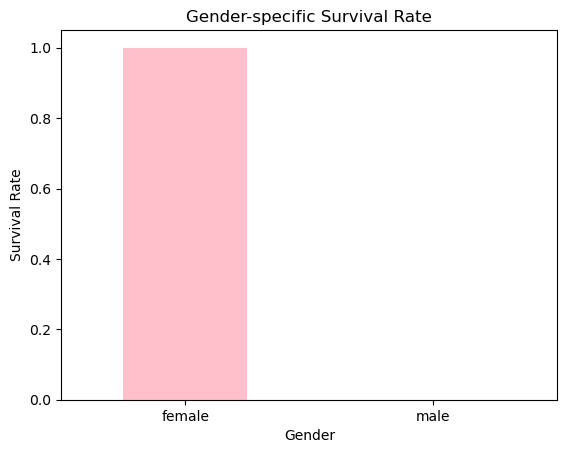

In [15]:
gender_dist=df.groupby('Sex')['Survived'].mean()
print(gender_dist)
gender_dist.plot(kind='bar',color=['pink','blue'])
plt.title("Gender-specific Survival Rate")
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

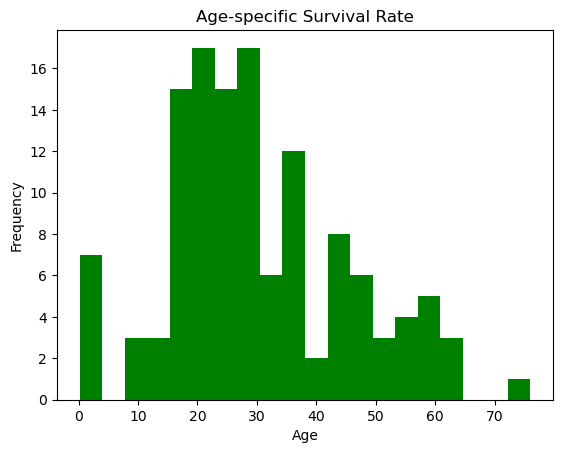

1      47.0
4      22.0
6      30.0
8      18.0
12     23.0
       ... 
402    22.0
409     3.0
411    37.0
412    28.0
414    39.0
Name: Age, Length: 127, dtype: float64


In [17]:
survived_ages=df[df['Survived']==1]['Age'].dropna()
plt.hist(survived_ages,bins=20, color='green')
plt.title('Age-specific Survival Rate')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()
print(survived_ages)

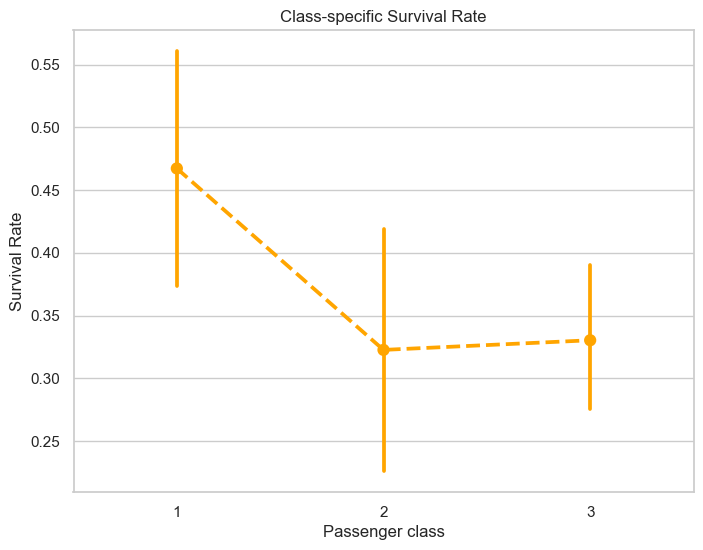

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.pointplot(x='Pclass',y="Survived",data=df,color='orange',linestyles='--')
plt.title('Class-specific Survival Rate')
plt.xlabel('Passenger class')
plt.ylabel('Survival Rate')
plt.show()

In [45]:
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [47]:
X = df[['Pclass','Sex','Age']]

X=pd.get_dummies(X,columns=['Sex'],drop_first=True)


In [49]:
X['Age'].fillna(X['Age'].median(),inplace=True)

In [50]:
Y=df['Survived']

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [52]:
model=LogisticRegression()

In [53]:
model.fit(X_train,Y_train)

LogisticRegression()

In [55]:
y_pred=model.predict(X_test)

In [60]:
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
report = classification_report(Y_test, y_pred)
print(report)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

